# PyTorch Workflow

Let's start

-  "data (prepare and load)",
-  "build model",
-  "fitting the model to data (training)",
-  "making predictions and evaluating a model (inference)",
-  "saving and loading a model",
-  "putting it all together"

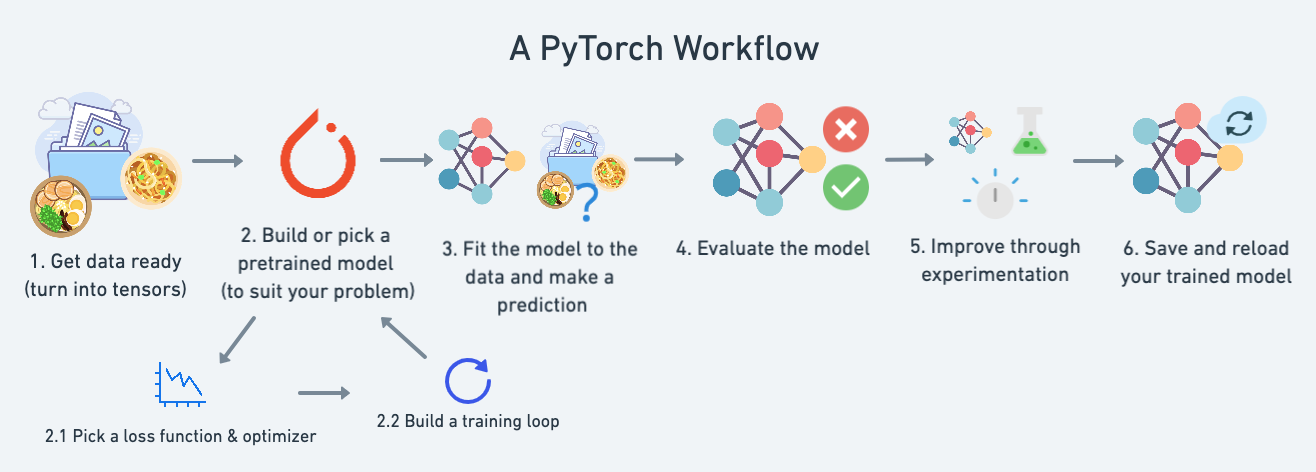

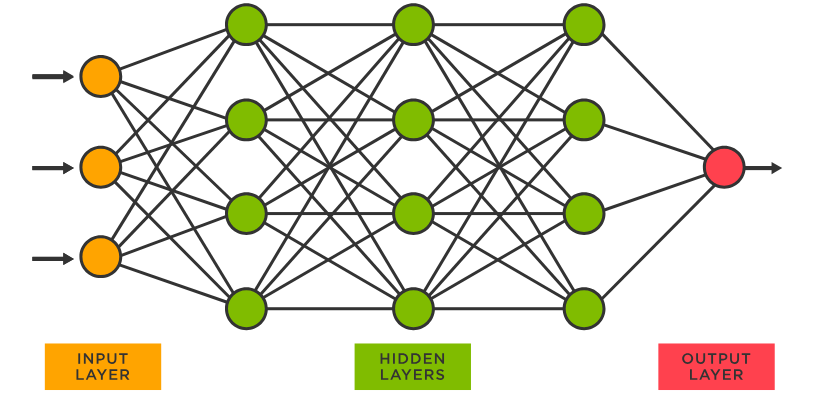

`torch`, `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [1]:
import torch
from torch import nn         # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

### **1. Data (preparing and loading)**

"**Data**" in machine learning can be almost anything
- Excel spreadsheet
- Images of any kind
- Videos(YouTube has lots of data..)
- Audio files like songs or podcasts
- protein structures
- Text and more.

Machine learning is a game of two parts:

 1. Get data into a numerical representation.
 2. Build a model to learn patterens in that numerical representation.

 To showcase this, let's create some *known* data using the **linear regression** formula  
 `A linear regression line has an equation of the form` **Y = a + bX**, where `X` is the explanatory variable and `Y` is the dependent variable. The slope (gradient) of the line is `b (weight)`, and `a (bias)` is the intercept (the value of y when x = 0).


 We'll use a linear regression formula to make a straight line with known **parameters**.

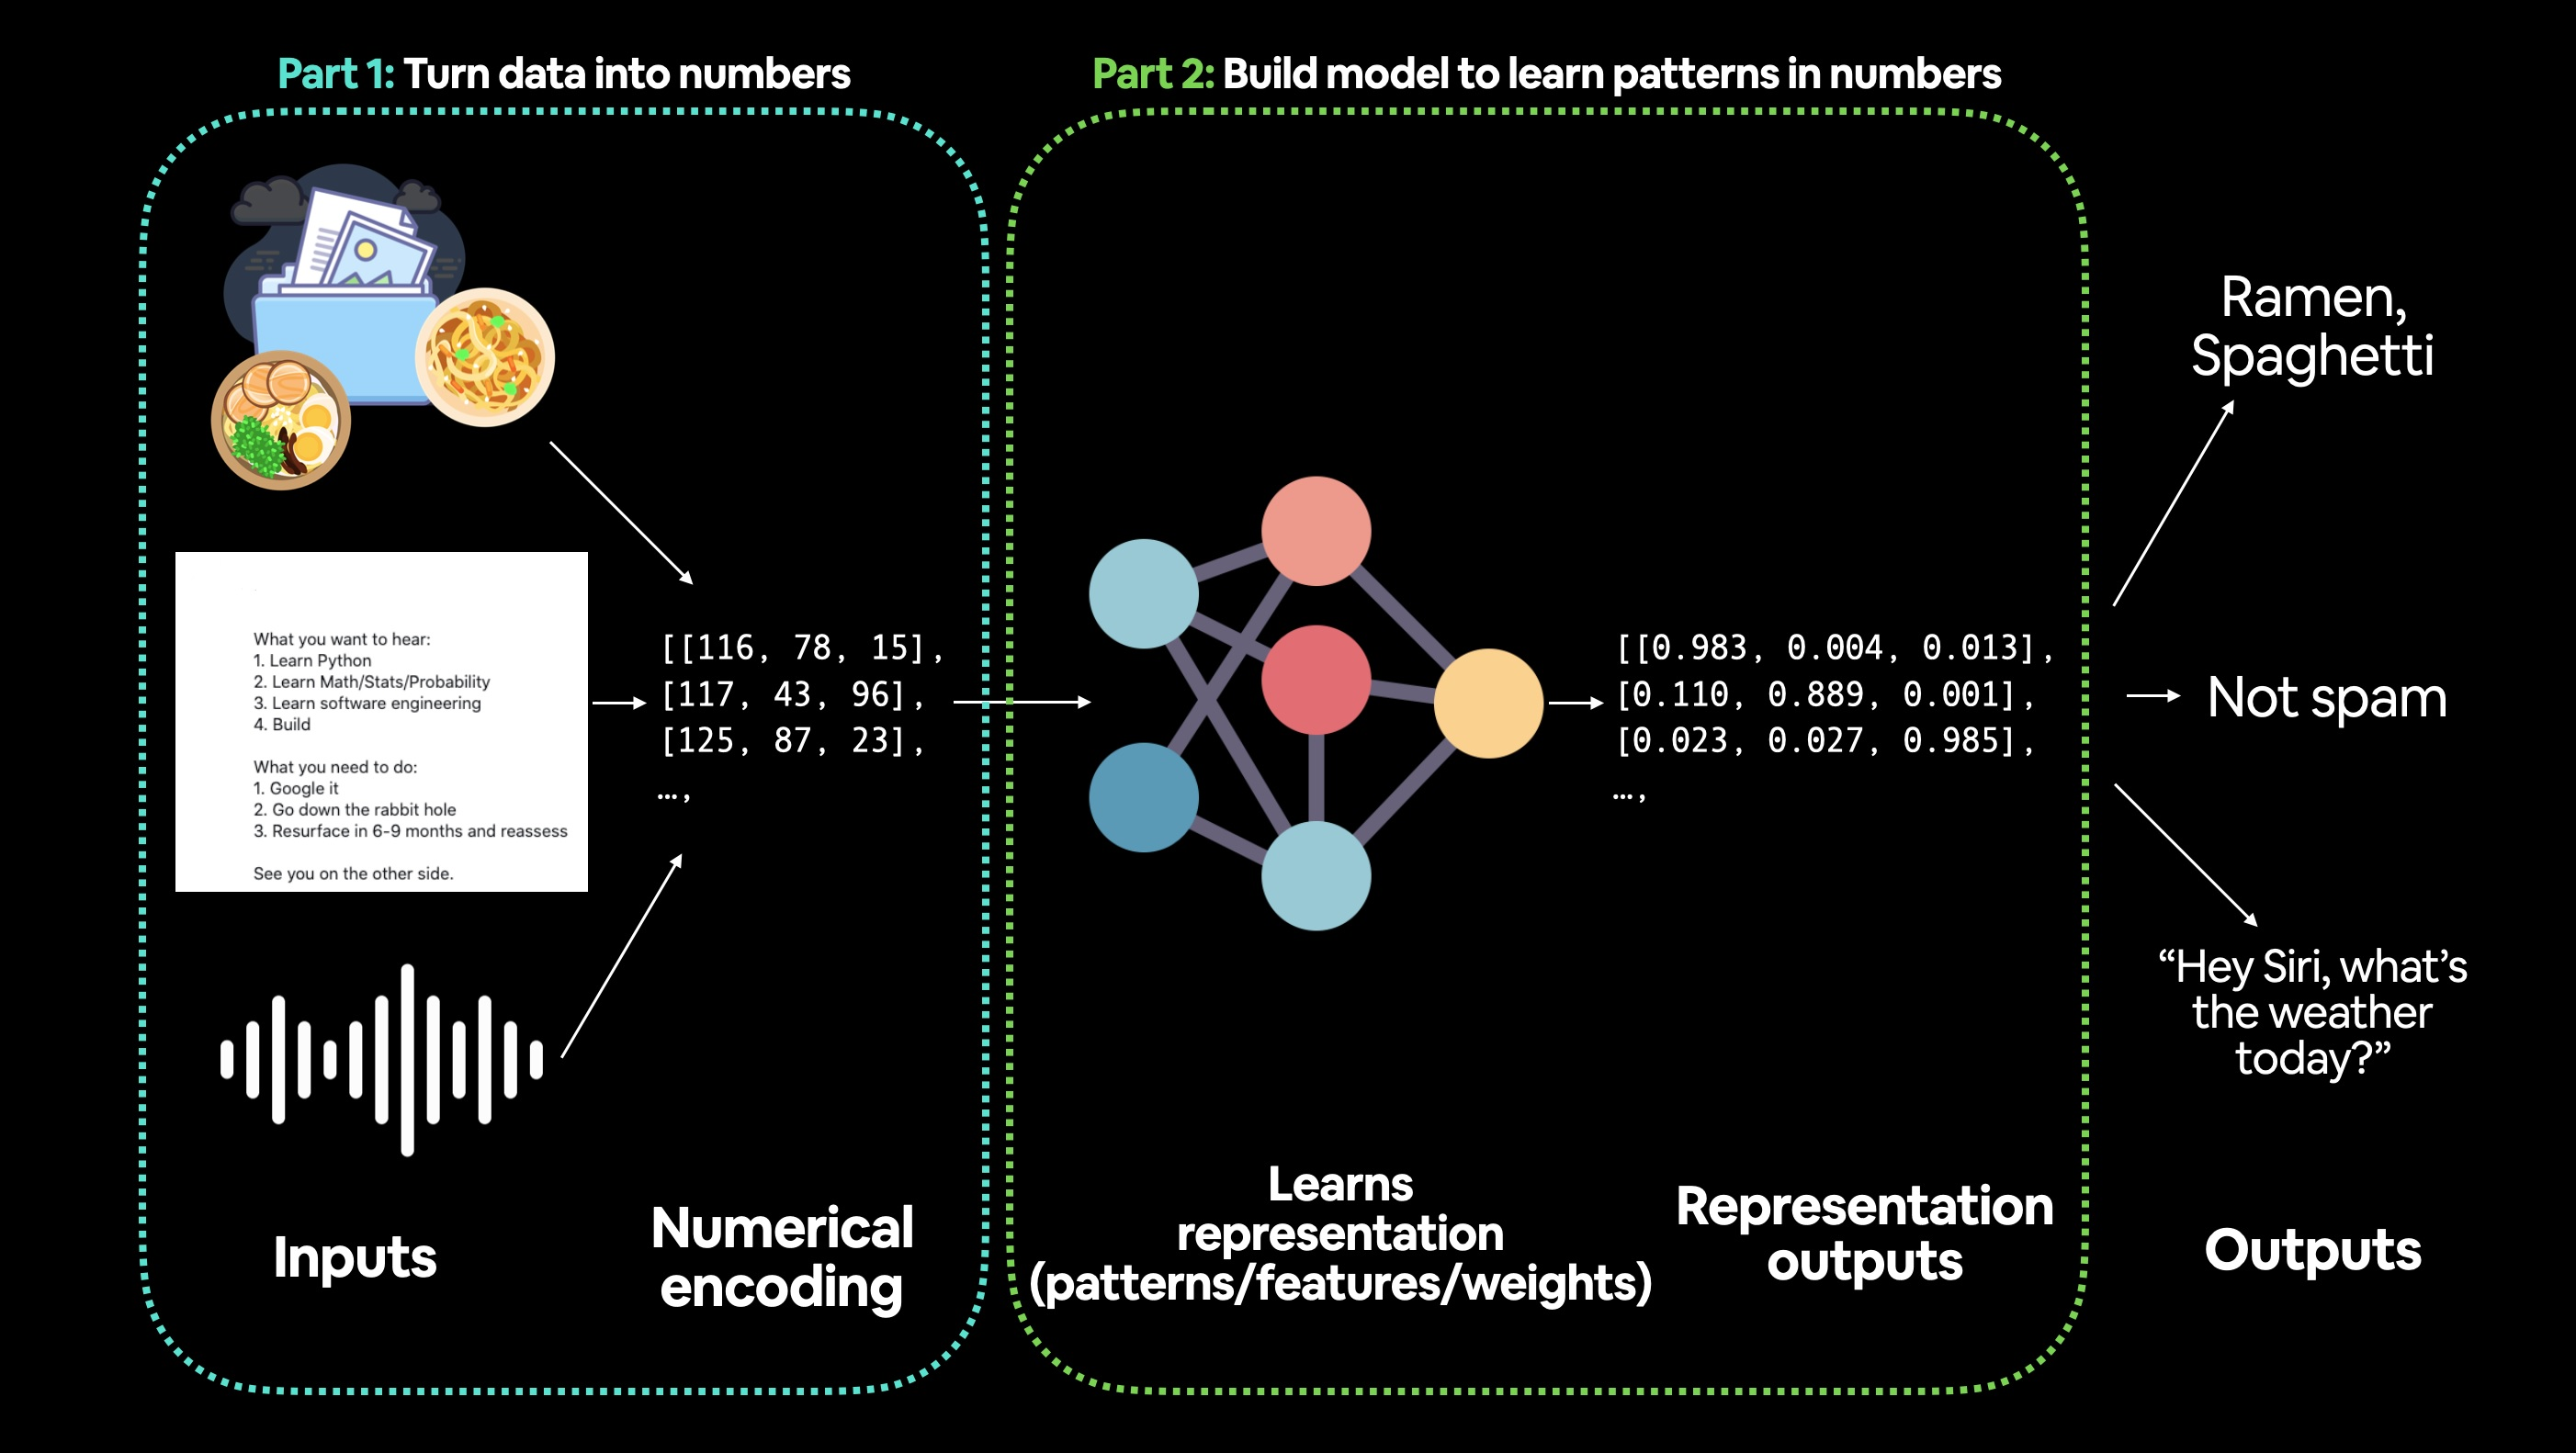

In [2]:
# Create *known* parameters
weight = 0.7 # b
bias = 0.3 # a

# Create data
start = 0
end = 1
step = 0.02
# X(capital) represents matrix or a tensor
X = torch.arange(start, end, step).unsqueeze(dim=1)
# y(lowercase) represents a vector
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
 len(X), len(y)

(50, 50)

### Spliting data into training and test sets (One of most important concepts in a machine learning in general)

Let's create a training and test set with our data.

In [4]:
# Create train/test split
train_split = int(0.8 * len(X))      # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# because we have training features, training labels, testing features, testing labels.
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visuilize our data?

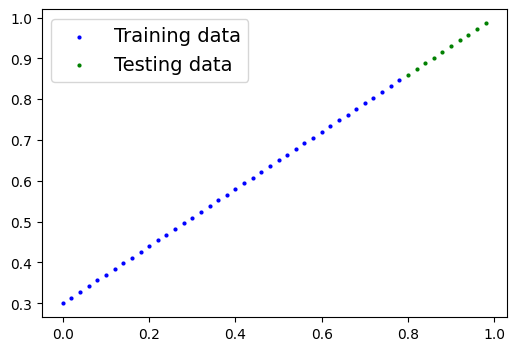

In [5]:
# Let's create a function to visualize it.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(6, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there prediction.
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

### **2. Build model**
 To create bits and pieces for building neural networks. recommend reading [Real Python's Object Orientating programming ](https://realpython.com/python3-object-oriented-programming/)

 what our model does:
 - Start with random values (weight & Bias)
 - Look at training data and adjust the random values to better represent (or get closer to ideal values (the weight & bias values we used to create the data).

How does it do so?

Through two main algorithms:
1. Gradient descent.
2. Backpropagation

In [6]:
from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhints from `nn.Module` (think of this as neural network lego blocks)
    def __init__(self): # create a constructor with the init function
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,                  # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### **PyTorch model building essentials**
[PyTorch](https://pytorch.org/tutorials/beginner/ptcheat.html) Cheat Sheet.

- `torch.nn`	- Contains all of the building blocks for computational graphs (a neural network can be considered a computational graph).
- `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it you should overwrite forward().
- `torch.optim` - (starts with random values and it looks at training data and adjust the random values to better represent the ideal values) this is where the optimizers in pytorch live, they will help with gradient descent.    
- `def forward()` -	All nn.Module subclasses require you overwritea forward(), this method defines what happens in the forward computation.

In [7]:
torch.randn(1)

tensor([-0.9182])

In [8]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### **Checking the contents of a PyTorch model**

Now let's create a model, let's see what's inside and check its parameters using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's  predictive power, let's see how well it predicts  `y_test` based on `X_test`.

when we pass data through our model, it's going to run it through the `forward()` method.

In [12]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# model it will take these x test values as input and it will return these y test values as output that's an ideal model
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

torch.inference_mode() is newer, potentially faster and preferred. See this [Tweet from PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) for more.

In [14]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# you can also do something similar with torch.no_grad(), however torch.inference_mode() is preferred.
# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

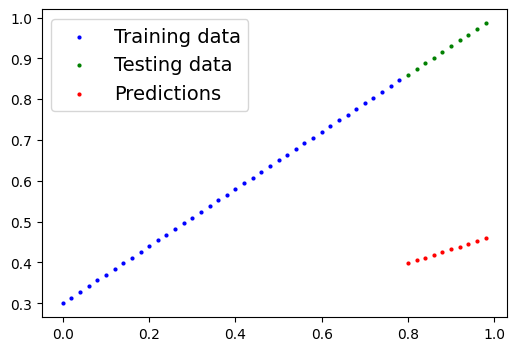

In [16]:
plot_predictions(predictions=y_preds)

so they're extremely far from where our ideal predictions. so if we go let's just estimate this as 0.35 to 0.8 there abouts so what's the difference there about 0.45. we could do the same again for all of these other dots and then maybe take the average of that.

### **3. Train model**

The whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some known parameter.

In other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your model's predictions are is to use a loss function.

- Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

- **Loss function:** A loss function is a function to measure how wrong your model's predictions are to the ideal outputs, so lower is better.

- **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias) in our case to improve loss function.

    - Inside the optimizer you'll often have to set two parameters:
       - `params` the model parameters you'd like to optimize, e.g. `params=model_0.parameters()`.   
       - `lr` (learning rate) - the learning rate is hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `Ir`result in small changes, a large `Ir`result in large changes).

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss
#loss_fn

# Setup the optimizer (stochastic gradient descent)
# it starts by randomly adjusting these values and once found some random values or random steps that have minimized the loss value. it's continue adjusting them that direction.
# if increase the weight it reduces the loss,
# for the bias, if it decreases the bias and loss increases well try increasing the bias.

optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate = possibly the most important hyper parameter you can set(how much the optimizer should change parameters at each step, higher=more

which loss function and which optimizer should i use?    

This will be problem specific.But with experience, you'll get an idea of what works and what's doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` like stochastic gradient descent will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll like want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0.  Loop through the data (data multiple times, first start with random prediction, some predictions to improve minimize the loss).
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions make predictions on data - also called forward propagation.  (functions might be plural, might be more than one and forward method recall).
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimize the zero grad
4. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).


In [20]:
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
torch.manual_seed(42)

# An epoch is one loop through the data... ( this is a hyperparameter because we've set it ourselves)
epochs = 200

# Create empty loss lists to track values
loss_values = []
test_loss_values = []
epoch_count = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  #  set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss:  {loss}")

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient decent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop...so we have to zero them above in step three for the next iteration of the loop


   ### Testing

  # Put the model in evaluation mode
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking & couple more things behind the scenes
  # with torch.no_grade(): # you may also see torch.no_grad() in older PyTorch code

    # 1. Do the Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test) # test loss because it's on the test dataset

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")

    # model_0.eval() # turns off gradient tracking

    # print out modle state_dict()
    print(model_0.state_dict())

  # loss is going decrease and improve it

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [22]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

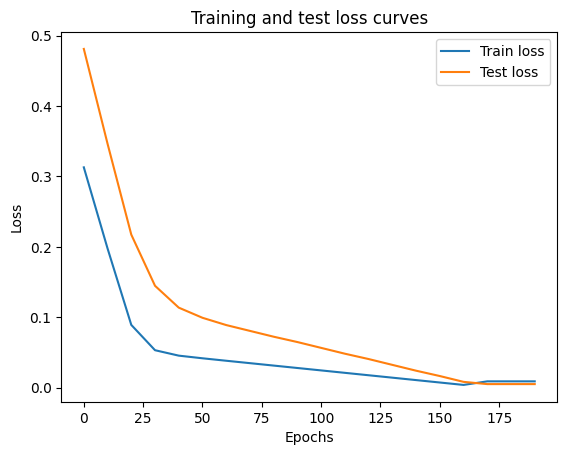

In [23]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
#  declining loss curve

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
weight, bias

(0.7, 0.3)

In [26]:
with torch.inference_mode():
    # 1. Forward pass on test data
    y_preds_new = model_0(X_test)

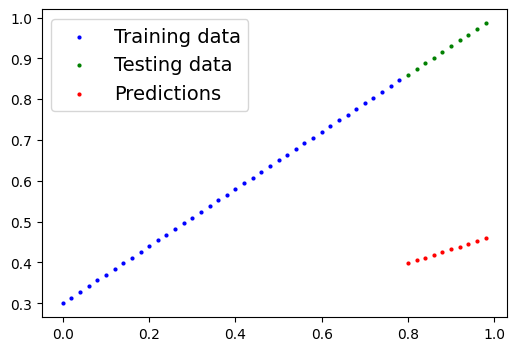

In [27]:
plot_predictions(predictions=y_preds);

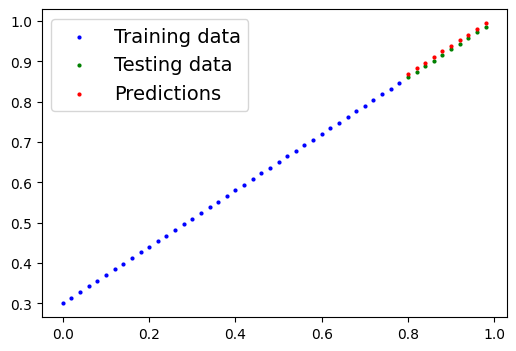

In [28]:
# new predictions very small distance low loss value
plot_predictions(predictions=y_preds_new);

### **Saving a model in PyTorch**

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` -  allows you to save a PyTorch object in python's pickle format.
2. `torch.load()` - allows you to load a save PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary




In [29]:
# it stores a lot of your model's important parameters in a simple python dictionary
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
model_0

LinearRegressionModel()

In [31]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [32]:
# Check the saved file path
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Sep 17 17:18 01_pytorch_workflow_model_0.pth


### **Loading a saved PyTorch model**

Since we've now got a saved model `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dick()` into that.



In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

Let's create another instance of `LinearRegressionModel()` model class. To load in a saved state_dict, we have to instantiate a new instance of our model class

In [34]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel() # which is a subclass of nn.module

# Load the saved state_dict of model_0 (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [35]:
# exact same values as above
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
# Make some predictions with our loaded model

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [38]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### **6. Putting it all together**

Let's go back through the steps above and see it all in one place.

In [40]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create a device agnostic code    

This means if we've got access to GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU.

In [41]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [42]:
!nvidia-smi

Sun Sep 17 17:18:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Create some data using the linear regression formula of y = weight * X + bias

In [43]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

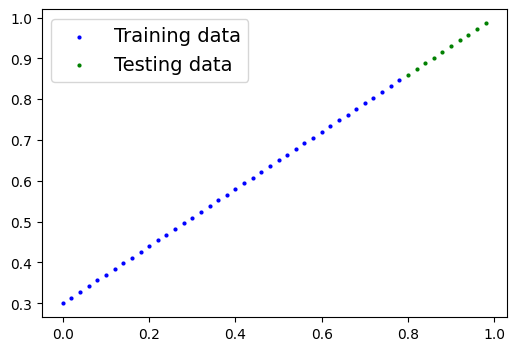

In [45]:
# Plot the data
# Note:  if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### **6.2 Building a PyTorch linear model**

In [46]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [47]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [49]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [50]:
# Set the model to use the target device
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### **6.3 Training**

For training we need:
- Loss function
- Optimizer
- Training Loop
- Testing Loop

In [52]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [53]:
# Lets training loop

torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Here our data as our data on the gpu, written device agnostic code for our data

# put data on the target device (device agnostic code for data)
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Performaning backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Train loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Train loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Train loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Train loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018

In [54]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [55]:
weight, bias

(0.7, 0.3)

### **Making and evaluating predictions**

In [56]:
# Turn the model into evaluation mode
model_0.eval()

# Make predictions on the test data because we train on the train data and we evaluate our model on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

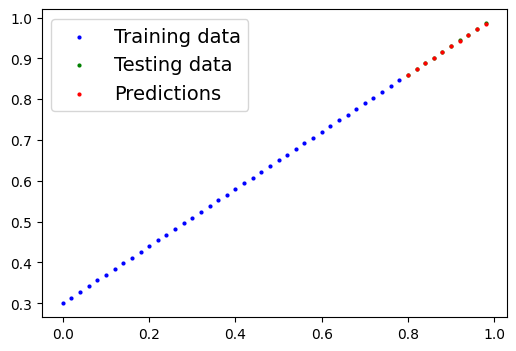

In [57]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5. Saving and loading a trained model

In [61]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [62]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### **Loading a saved PyTorch model's**

In [63]:
# create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [64]:
# check those parameters
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [66]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [67]:
# Evaluate the loaded model
# 1. Put the loaded model into evaluation mode
loaded_model_1.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test) # perform a forward pass on the test data with the loaded model

# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Finished up by saving and loading our trained model